<a href="https://colab.research.google.com/github/zyx20180209/test2023/blob/main/tensorflow_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [2]:
train_data, validation_data = tfds.load('tf_flowers',
                                        split = ['train[:80%]',
                                                 'train[80%:]'],
                                        as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [3]:
# define a function that preprocess the data
# have 64x64 pixel values and rescale all pixel values to have values between 0 and 1
def preprocess(image, label): 
  image2 = tf.image.resize(image, size=(64,64))/255.0 
  label2 = tf.one_hot(label, depth=5) 
  return image2, label2

In [4]:
train = train_data.map(preprocess)
validation = validation_data.map(preprocess)

In [5]:
# generate mini-batches of 32 samples randomly selected from a buffer of 1000 items
train= train.shuffle(buffer_size=1000, seed=99, reshuffle_each_iteration=
True)
train_batched = train.batch(batch_size= 32)

In [6]:
model_c = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation='relu', 
                           input_shape=(64,64,3)), 
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation='relu'), 
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 

In [7]:
model_c.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [8]:
history_c = model_c.fit(train_batched, epochs=20)

Epoch 1/20
92/92 [==============================] - 31s 297ms/step - loss: 1.5919 - accuracy: 0.2783
Epoch 2/20
92/92 [==============================] - 28s 305ms/step - loss: 1.5714 - accuracy: 0.3311
Epoch 3/20
92/92 [==============================] - 20s 215ms/step - loss: 1.5510 - accuracy: 0.3559
Epoch 4/20
92/92 [==============================] - 24s 263ms/step - loss: 1.5275 - accuracy: 0.3723
Epoch 5/20
92/92 [==============================] - 20s 214ms/step - loss: 1.5013 - accuracy: 0.3815
Epoch 6/20
92/92 [==============================] - 22s 230ms/step - loss: 1.4742 - accuracy: 0.3934
Epoch 7/20
92/92 [==============================] - 21s 223ms/step - loss: 1.4456 - accuracy: 0.4005
Epoch 8/20
92/92 [==============================] - 19s 209ms/step - loss: 1.4178 - accuracy: 0.4074
Epoch 9/20
92/92 [==============================] - 21s 224ms/step - loss: 1.3892 - accuracy: 0.4186
Epoch 10/20
92/92 [==============================] - 20s 214ms/step - loss: 1.3624 - accura

In [9]:
model_d = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation=None, 
                           input_shape=(64,64,3)), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
                               
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation=None), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
                               
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=None),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(5, activation='softmax')
]) 

In [10]:
model_d.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [11]:
history_d = model_d.fit(train_batched, epochs=20)

Epoch 1/20
92/92 [==============================] - 28s 286ms/step - loss: 1.5289 - accuracy: 0.3903
Epoch 2/20
92/92 [==============================] - 26s 283ms/step - loss: 1.1800 - accuracy: 0.5456
Epoch 3/20
92/92 [==============================] - 26s 284ms/step - loss: 1.0477 - accuracy: 0.5998
Epoch 4/20
92/92 [==============================] - 26s 284ms/step - loss: 0.9745 - accuracy: 0.6304
Epoch 5/20
92/92 [==============================] - 26s 283ms/step - loss: 0.9109 - accuracy: 0.6628
Epoch 6/20
92/92 [==============================] - 26s 284ms/step - loss: 0.8608 - accuracy: 0.6897
Epoch 7/20
92/92 [==============================] - 27s 288ms/step - loss: 0.8288 - accuracy: 0.7067
Epoch 8/20
92/92 [==============================] - 26s 285ms/step - loss: 0.7928 - accuracy: 0.7306
Epoch 9/20
92/92 [==============================] - 26s 286ms/step - loss: 0.7438 - accuracy: 0.7565
Epoch 10/20
92/92 [==============================] - 26s 285ms/step - loss: 0.7231 - accura

In [12]:
# randomly rotate and flip the image
import random
def data_aug(image, label): 
  x = random.randint(0,1)
  if x == 0:
    image2 = tf.image.flip_up_down(image)
  else: 
    image2 = tf.image.adjust_contrast(image, 1.5)
  return image2, label 

train_aug = train_data.map(data_aug) 
train_large = train_data.concatenate(train_aug) 

In [13]:
train_f = train_large.map(preprocess)
train_f= train_f.shuffle(buffer_size=1000, seed=99, reshuffle_each_iteration=
True)
trainf_batched = train_f.batch(batch_size= 32)

In [14]:
model_g = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation=None, 
                           input_shape=(64,64,3)), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
                               
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same',
                           use_bias=False, 
                           activation=None), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2),
                                 strides=2,
                                 padding="valid"),
                               
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=None),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(5, activation='softmax')
]) 

In [15]:
model_g.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [16]:
history_g = model_g.fit(trainf_batched, epochs=20)

Epoch 1/20
184/184 [==============================] - 55s 292ms/step - loss: 1.3929 - accuracy: 0.4356
Epoch 2/20
184/184 [==============================] - 54s 293ms/step - loss: 1.1193 - accuracy: 0.5683
Epoch 3/20
184/184 [==============================] - 54s 292ms/step - loss: 1.0084 - accuracy: 0.6262
Epoch 4/20
184/184 [==============================] - 54s 293ms/step - loss: 0.9277 - accuracy: 0.6633
Epoch 5/20
184/184 [==============================] - 54s 291ms/step - loss: 0.8701 - accuracy: 0.6921
Epoch 6/20
184/184 [==============================] - 54s 294ms/step - loss: 0.8284 - accuracy: 0.7101
Epoch 7/20
184/184 [==============================] - 54s 292ms/step - loss: 0.7826 - accuracy: 0.7250
Epoch 8/20
184/184 [==============================] - 53s 289ms/step - loss: 0.7418 - accuracy: 0.7464
Epoch 9/20
184/184 [==============================] - 53s 287ms/step - loss: 0.7085 - accuracy: 0.7662
Epoch 10/20
184/184 [==============================] - 53s 286ms/step - l

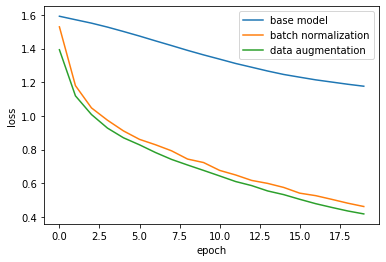

In [17]:
# plot losses
closses = history_c.history['loss']
dlosses = history_d.history['loss']
glosses = history_g.history['loss']

plt.plot(closses, label='base model')
plt.plot(dlosses, label='batch normalization')
plt.plot(glosses, label='data augmentation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

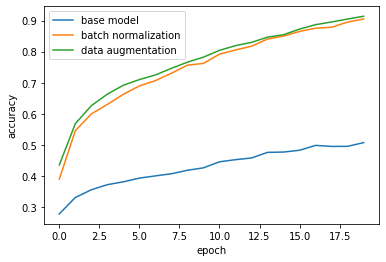

In [18]:
# plot accuracy
caccuracy = history_c.history['accuracy']
daccuracy = history_d.history['accuracy']
gaccuracy = history_g.history['accuracy']

plt.plot(caccuracy, label='base model')
plt.plot(daccuracy, label='batch normalization')
plt.plot(gaccuracy, label='data augmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()